In [14]:
import pandas as pd
from data import load_database_train
from plotter import plot_all_readings
from preprocessing import InterpolateRawData
import pandas as pd
%matplotlib inline

# Dados de treino

In [15]:
database_train = load_database_train()
print(database_train.__dict__.keys())

dict_keys(['datalist', 'datadict', 'X', 'y', 'cv_author', 'label_encoder', 'ones_encoder', 'y_encoded'])


In [16]:
df = pd.DataFrame(data=database_train.datadict)
pd.set_option('display.max_rows', None)
df

,spell,author,device,date,acc_data,gyr_data,time
0,REVELIO,ANDERSON,SAMSUNG_A5,2020-07-27 10:09:44.257560,403,403,2039.014520
1,ALOHOMORA,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:00:17.156331,366,366,1768.066406
2,REVELIO,GUILHERME,SAMSUNG_S8,2020-07-27 21:14:41.826820,2215,2215,4430.953224
3,ALOHOMORA,HEITOR,MOTO_X,2020-07-27 09:27:42.109446,399,399,1928.009033
4,ARRESTO_MOMENTUM,ANDERSON,SAMSUNG_A5,2020-07-27 09:58:10.281511,357,357,1809.375461
5,ARRESTO_MOMENTUM,YURI,SAMSUNG_NOTE_10,2020-07-26 21:19:02.898035,1263,1263,2523.707207
6,REVELIO,YURI,SAMSUNG_NOTE_10,2020-07-26 21:25:38.191341,633,633,1263.847262
7,ALOHOMORA,GUILHERME,SAMSUNG_S8,2020-07-27 21:04:25.738917,2519,2519,5039.429204
8,ARRESTO_MOMENTUM,GUILHERME,SAMSUNG_S8,2020-07-27 21:08:58.122272,2343,2343,4687.311764
9,ARRESTO_MOMENTUM,HEITOR,MOTO_X,2020-07-27 09:28:51.203941,305,305,1472.656250


In [17]:
df.groupby(['author', 'spell']).size()

author     spell             
ANDERSON   ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
DIEGO      ALOHOMORA             20
           ARRESTO_MOMENTUM      18
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
GUILHERME  ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
HEITOR     ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     20
           INCENDIO              20
           REVELIO               20
           WINGARDIUM_LEVIOSA    20
YURI       ALOHOMORA             20
           ARRESTO_MOMENTUM      20
           FINITE_INCANTATEM     2

In [5]:
df.sort_values('time')

,spell,author,device,date,acc_data,gyr_data,time
330,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:17.860105,207,207,1049.664489
353,ARRESTO_MOMENTUM,YURI,SAMSUNG_NOTE_10,2020-07-26 21:22:03.196856,553,553,1103.867750
341,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:10.368367,221,221,1119.231221
451,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:39.735411,223,223,1128.469319
235,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:06.125662,225,225,1134.372570
514,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:28.745188,227,227,1145.101746
460,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:55:47.158831,227,227,1154.956887
532,ALOHOMORA,ANDERSON,SAMSUNG_A5,2020-07-27 10:04:26.838803,231,231,1167.351746
398,WINGARDIUM_LEVIOSA,ANDERSON,SAMSUNG_A5,2020-07-27 09:54:34.167558,231,231,1170.515977
550,FINITE_INCANTATEM,YURI,SAMSUNG_NOTE_10,2020-07-26 21:24:13.399356,590,590,1177.856268


### Exemplo de dado com gráfico

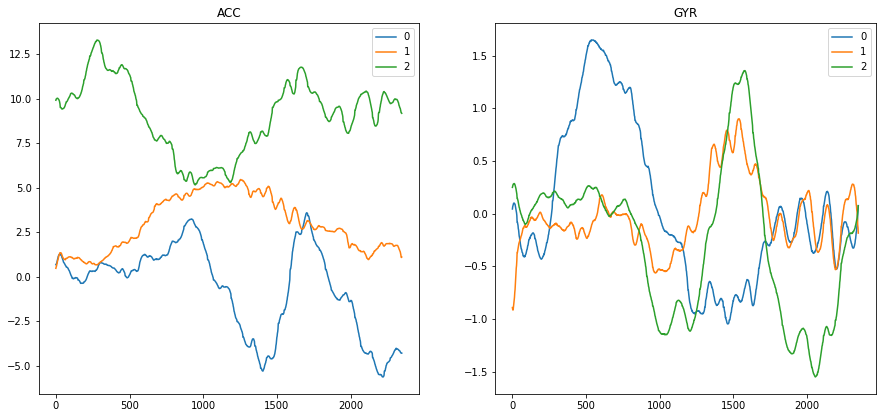

In [6]:
plot_all_readings(database_train.datalist[0].readings, table_format=(0, 2))

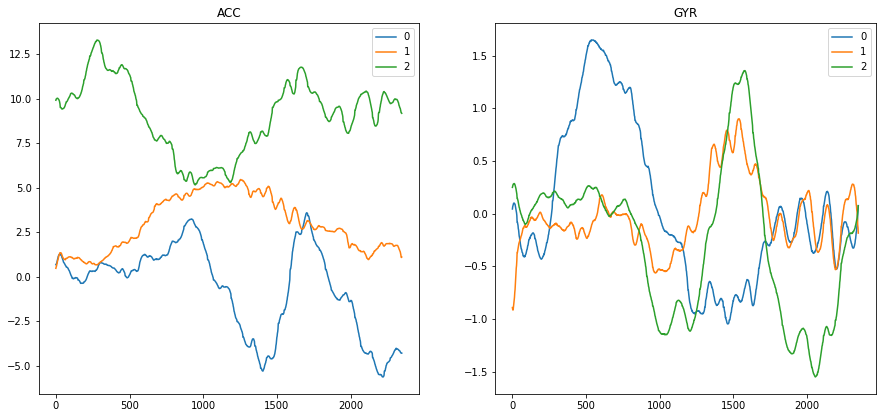

In [7]:
plot_all_readings(database_train.datalist[0].readings, table_format=(0, 2))

In [9]:
database_train.datalist[0].readings

{'ACC': array([[ 0.00000000e+00,  6.84762600e-01,  4.81249240e-01,
          9.92187500e+00],
        [ 2.00013300e+00,  7.11099600e-01,  5.53077460e-01,
          9.98652000e+00],
        [ 3.99986600e+00,  7.39830900e-01,  5.96174400e-01,
          9.99609800e+00],
        ...,
        [ 2.34372671e+03, -4.28814600e+00,  1.11333780e+00,
          9.21556400e+00],
        [ 2.34572618e+03, -4.28814600e+00,  1.08700070e+00,
          9.20838100e+00],
        [ 2.34772591e+03, -4.28575200e+00,  1.11333780e+00,
          9.18922700e+00]]),
 'GYR': array([[ 0.00000000e+00,  4.39975700e-02, -8.91766700e-01,
          2.49291050e-01],
        [ 2.00013300e+00,  6.59887200e-02, -9.09481800e-01,
          2.63340950e-01],
        [ 3.99986600e+00,  7.57625600e-02, -9.15590500e-01,
          2.72503940e-01],
        ...,
        [ 2.34372671e+03, -4.87165000e-03, -1.06804900e-01,
          1.89948550e-02],
        [ 2.34572618e+03,  2.62824760e-02, -1.32461250e-01,
          3.97642740e-02],
 

# Processamento de dados para o modelagem

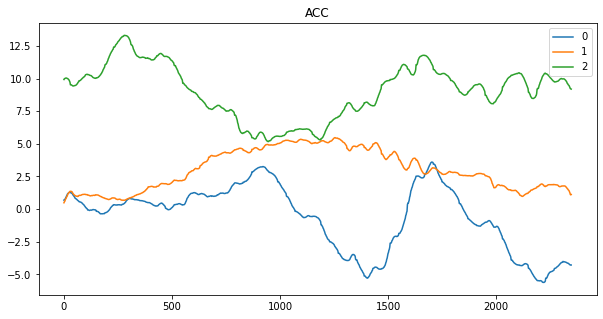

In [17]:
plot_all_readings(database_train.datalist[0].readings, keys=['ACC'], table_format=(1, 1), figsize=(10, 5))

### Modos de interpolação

<AxesSubplot:title={'center':'Gráfico do acelerometro interpolada em timesteps equidistantes'}>

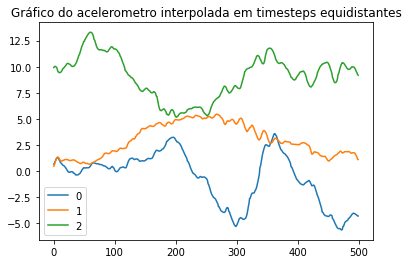

In [22]:
X = InterpolateRawData(num_samples=500, flatten_data=False, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico do acelerometro interpolada em timesteps equidistantes")

<AxesSubplot:title={'center':'Gráfico do acelerometro interpolada em timesteps equidistantes flatten'}>

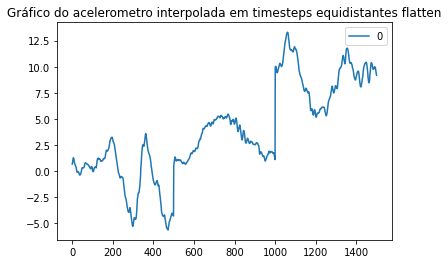

In [24]:
import numpy as np
X = InterpolateRawData(num_samples=500, flatten_data=True, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico do acelerometro interpolada em timesteps equidistantes flatten")

<AxesSubplot:title={'center':'Gráfico com tempo maximo 6s e timestep de 10ms'}>

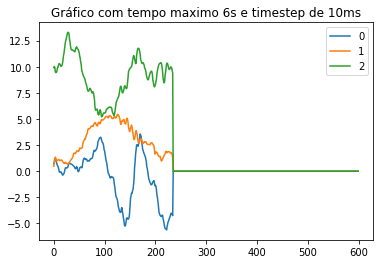

In [30]:
import numpy as np
X = InterpolateRawData(num_samples=None, timestep=10, max_time=6000, 
                       flatten_data=False, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico com tempo maximo 6s e timestep de 10ms")

<AxesSubplot:title={'center':'Gráfico com tempo maximo 6s e timestep de 10ms flaten'}>

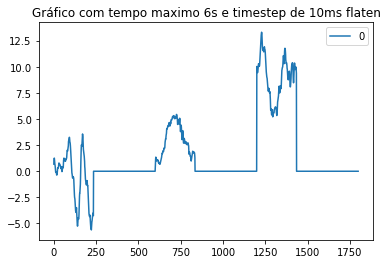

In [29]:
import numpy as np
X = InterpolateRawData(num_samples=None, timestep=10, max_time=6000, 
                       flatten_data=True, features_name=["ACC"]).fit_transform(database_train.X)
df = pd.DataFrame(data=X[0])
df.plot(title="Gráfico com tempo maximo 6s e timestep de 10ms flaten")